## Regression Model

To better understand the factors that drive product purchase quantity in a retail context, we developed a linear regression model using transactional data. The goal was to examine how unit price, customer demographics (age group and gender), and their interactions influence the quantity of items purchased in a single transaction.

**Our model:** 

Quantity = β0 + β1*(Price per Unit) + β2*(Age Group) + β3*(Gender) + β4*(Price per Unit*Age Group) + β5*(Price per Unit*Gender) + ε

This specification allows us to capture both the main effects of price, age, and gender, and how these effects interact - particularly, whether price sensitivity differs by demographic group.

The interaction terms capture differential price sensitivity, such as how price impacts might vary between age groups or between male and female customers. This allows the model to go beyond average effects and identify segment-specific behavioral patterns, which are often crucial for effective targeting and personalization in modern retail strategies.

From an **industry perspective**, this type of model provides valuable insights into price sensitivity across different customer segments. For example:

- Personalized pricing and promotions
- Demand forecasting
- Segmentation analysis
- Strategic decision-making

While the model’s predictive power is limited, it offers a foundational framework for interpreting customer behavior and can be expanded by incorporating additional variables such as seasonality, product-level features, loyalty data, or promotional history. In real-world applications, such models could be integrated into business intelligence dashboards or dynamic pricing systems to support evidence-based decision-making.

In [1]:
# Import libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load processed dataset
df = pd.read_csv("data/processed/processed_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Create interaction terms with price and age group dummies 
df['Price_Age_25_40'] = df['Price per Unit'] * df.get('Age Group_25-40', 0)
df['Price_Age_40_60'] = df['Price per Unit'] * df.get('Age Group_40-60', 0)
df['Price_Age_60+']   = df['Price per Unit'] * df.get('Age Group_60+', 0)

# Interaction term with gender (numeric 0/1)
df['Price_Gender_Interaction'] = df['Price per Unit'] * df['Gender_Num']

# Define independent variables (X) and dependent variable (y)
X = df[['Price per Unit', 'Gender_Num', 
        'Age Group_25-40', 'Age Group_40-60', 'Age Group_60+',
        'Price_Age_25_40', 'Price_Age_40_60', 'Price_Age_60+',
        'Price_Gender_Interaction']]

y = df['Quantity']

# Preview
df.head(10)

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,High Spender,Month,Day of Week,...,Age Group_25-40,Age Group_40-60,Age Group_60+,Gender_Num,AgeGroup_Num,ProductCategory_Num,Price_Age_25_40,Price_Age_40_60,Price_Age_60+,Price_Gender_Interaction
0,1,2023-11-24,CUST001,34,3,50,150,0,11,4,...,True,False,False,0,2,3,50,0,0,0
1,2,2023-02-27,CUST002,26,2,500,1000,1,2,0,...,True,False,False,1,2,1,500,0,0,500
2,3,2023-01-13,CUST003,50,1,30,30,0,1,4,...,False,True,False,0,3,2,0,30,0,0
3,4,2023-05-21,CUST004,37,1,500,500,0,5,6,...,True,False,False,0,2,1,500,0,0,0
4,5,2023-05-06,CUST005,30,2,50,100,0,5,5,...,True,False,False,0,2,3,50,0,0,0
5,6,2023-04-25,CUST006,45,1,30,30,0,4,1,...,False,True,False,1,3,3,0,30,0,30
6,7,2023-03-13,CUST007,46,2,25,50,0,3,0,...,False,True,False,0,3,1,0,25,0,0
7,8,2023-02-22,CUST008,30,4,25,100,0,2,2,...,True,False,False,0,2,2,25,0,0,0
8,9,2023-12-13,CUST009,63,2,300,600,0,12,2,...,False,False,True,0,4,2,0,0,300,0
9,10,2023-10-07,CUST010,52,4,50,200,0,10,5,...,False,True,False,1,3,1,0,50,0,50


In [2]:
# Split our dataset into 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, random_state=42
)

In [3]:
# Add constant (intercept) to both train and test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Convert to numeric dtype (avoids the error)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use Variance Inflation Factor (VIF) to detect multicollinearity
X_vif = X_train.copy()
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


                   Variable        VIF
0                     const  15.795388
1            Price per Unit   8.142365
2                Gender_Num   1.875086
3           Age Group_25-40   4.313273
4           Age Group_40-60   4.522072
5             Age Group_60+   2.994777
6           Price_Age_25_40   5.423326
7           Price_Age_40_60   6.046173
8             Price_Age_60+   2.867998
9  Price_Gender_Interaction   2.847893


To evaluate the potential impact of multicollinearity in the regression model, we computed **Variance Inflation Factors (VIFs)** for all independent variables. VIF quantifies how much the variance of a coefficient is inflated due to correlations with other predictors.

**Variable VIF**

To evaluate the potential impact of multicollinearity in the regression model, we computed Variance Inflation Factors (VIFs) for all independent variables. VIF quantifies how much the variance of a coefficient is inflated due to correlations with other predictors.

Key observations:

- Most predictors have VIFs below 5, indicating acceptable levels of multicollinearity.

- A few variables - particularly `Price per Unit` (VIF = 8.14) and interaction terms like `Price × Age 40–60` (VIF = 6.05) - show moderate multicollinearity, which is common when including both main effects and interaction terms in a model.

- The `intercept (const)` has a high VIF (15.80), but this is not typically a concern, as it doesn’t affect inference on other coefficients.

- Overall, while some multicollinearity is present — especially between unit price and age-related interaction terms — it is not severe enough to invalidate the model. However, it may contribute to inflated standard errors, which could partially explain the lack of statistical significance for some predictors.

In [13]:
# Fit the model on training data
model = sm.OLS(y_train, X_train).fit()

# Extract summary 
full_summary = model.summary().as_text()

# Save as plain text in a markdown file 
with open("images/03_regression_model/regression_output.md", "w") as f:
    f.write(full_summary)

# Print summary: coefficients, t-stats, etc.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.172
Date:                Fri, 18 Jul 2025   Prob (F-statistic):              0.310
Time:                        19:39:29   Log-Likelihood:                -1148.1
No. Observations:                 750   AIC:                             2316.
Df Residuals:                     740   BIC:                             2362.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**OLS Regression Results Summary**

**Model Objective:**
Predict Quantity purchased based on unit price, age group, gender, and their interactions.

**Model Fit:**
- R-squared: 0.014 → Model explains only 1.4% of variation in Quantity which shows weak explanatory power.

- Adjusted R-squared: 0.002

- F-statistic: 1.172, p-value: 0.310 → Model is not statistically significant overall. In other words, our predictors jointly do not explain the variation in Quantity at conventional significance levels (p > 0.05).

**Key Findings:**

- `Price per Unit`: Coefficient = +0.0017, p = 0.007, t = 2.72
 
   → Higher prices slightly increases Quantity on average. The effect is small but statistically significant at 1% level. 

- `Gender` (Female vs. Male): Not significant (p = 0.559, t = 0.58)

   → No clear evidence of gender-based differences in purchase quantity.

- `Age Groups`:
 - `25–40`: Coefficient = +0.3823, p = 0.042, t = 2.04  -> Statistically significant at 5% level
 - `40–60`: Coefficient = +0.3639, p = 0.039, t = 2.07  -> Statistically significant at 5% level
 - `60+`: Not significant (p = 0.435)

   → Customers aged 25–60 buy slightly more than those under 25.


- **Interaction Terms:**
 - `Price * Age 25–40`: Negative, p = 0.023, t = -2.29  -> Statistically significant at 5% level
 - `Price * Age 40–60`: Negative, p = 0.005, t = -2.84  -> Statistically significant at 1% level
 - `Price * Age 60+`: Not significant
 
   → Higher prices reduce quantity more for age groups 25–60.
 
 - `Price * Gender`: Not significant


- **Diagnostic Notes:**
 - Residuals are non-normal (Jarque-Bera p < 0.001)
 - Condition number ≈ 2630 → Indicates potential multicollinearity due to dummy and interaction terms. We already evaluated this with VIF above. 
 - Durbin-Watson = 1.95 → No autocorrelation concerns.


- **Conclusions:**

 - Some individual coefficients, such as price per unit, age groups 25-40 and 40-60, and their interaction terms, are statistically significant which implies that they have significant explanatory power in explaining the quantity purchased.  

 - However, the overall model lacks predictive power with low R2 and F-statistic. Thus, our model is not explaining the variability in quantity well. Most of the variation is likely driven by factors not included in the model.

 - Interaction terms reveal age-based differences in price sensitivity.

 - Gender appears to have no meaningful effect on quantity purchased.

 - Interestingly, the regression model reports a positive and statistically significant main effect of price per unit, suggesting that - all else equal - higher-priced products are associated with larger quantities purchased. While this may seem counterintuitive from a classical demand perspective, it could reflect nonelastic or luxury-oriented purchasing behavior, or the presence of premium product categories where higher prices do not deter demand and may even be associated with perceived value.

 - However, the model also includes interaction terms between price and age group, and these show significant negative coefficients for customers aged 25–60. This indicates that for these segments, higher prices are associated with lower quantities purchased, aligning more closely with traditional downward-sloping demand behavior. In other words, price sensitivity does exist in the data, but it varies across customer segments.


In [6]:
# Predict on test data
y_pred_test = model.predict(X_test)

In [7]:
# Evaluate model performance on test set

# Root Mean Squared Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred_test) / y_test))) * 100

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_test) ** 0.5

# R-squared on test set
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set RMSPE: {rmspe:.2f}%")
print(f"Test Set RMSE: {rmse:.2f}")
print(f"Test Set R-squared: {r2_test:.4f}")

Test Set RMSPE: 82.07%
Test Set RMSE: 1.16
Test Set R-squared: -0.0134


- **Additional Notes**
- To assess the model's ability to generalize beyond the data it was trained on, we randomly split the dataset into a training set (75%) and a test set (25%). The linear regression model was fitted using the training data, and the resulting coefficients were used to predict purchase quantities on the test set.

- We evaluated the model's performance on the test data using the following metrics:
 Root Mean Squared Percentage Error (RMSPE): 82.07%
 Root Mean Squared Error (RMSE): 1.16
 R-squared: -0.0134

- These results indicate that the model performs poorly on unseen data. The high RMSPE suggests considerable percentage error in predictions, and the negative R-squared implies that the model performs worse than simply predicting the mean of the target variable. This confirms that the current model lacks predictive power and highlights the need for additional features or alternative modeling approaches to improve performance. Besides, RMSE = 1.16 means that, on average, the predicted quantity is off by about 1.16 units. Since typical quantities in our data are small (e.g., 1–4 items), then an RMSE of 1.16 is a large error. 

**Visualizations**


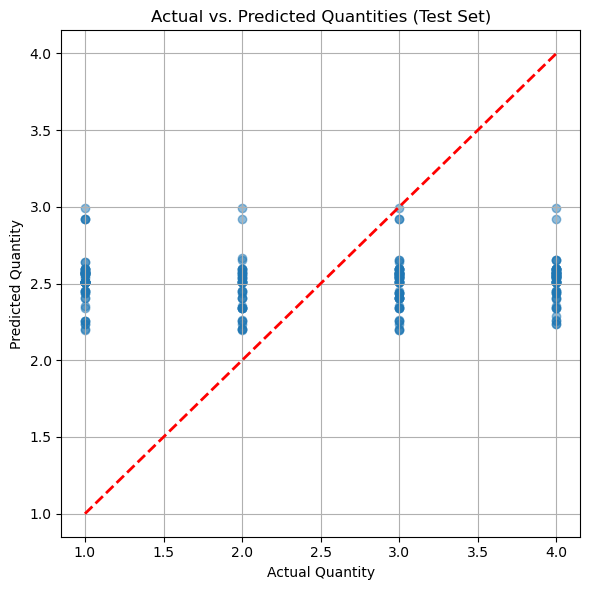

In [8]:
import matplotlib.pyplot as plt

#  Actual vs. Predicted Plot (Test Set) 

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Quantity")
plt.ylabel("Predicted Quantity")
plt.title("Actual vs. Predicted Quantities (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/03_regression_model/Actual vs. Predicted Quantities (Test Set).png", dpi=300)
plt.show()

- Actual vs. Predicted Plot: Assess model accuracy on test set
  
  This plot shows how well the model’s predictions align with the actual values. Ideally, all points should fall along the 45-degree reference line (red dashed), which represents perfect predictions.
  In our plot, we observe a noticeable deviation from this line, indicating that the model makes several poor predictions and struggles to accurately capture the true quantity values.


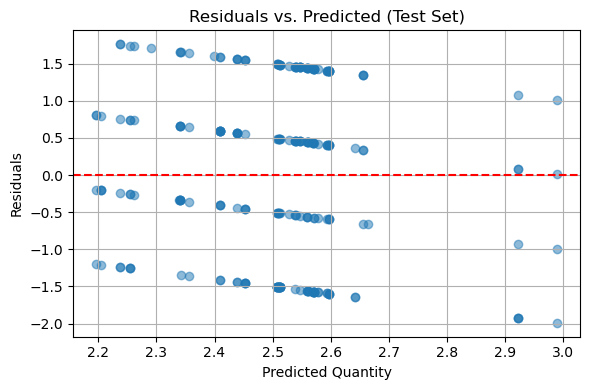

In [9]:
# Residual Plot (Predicted vs. Residuals)

residuals = y_test - y_pred_test

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Quantity")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig("images/03_regression_model/Residuals vs. Predicted (Test Set).png", dpi=300)
plt.show()

- Residual Plot (Predicted vs. Residuals): Check for patterns, variance issues
  
  This plot helps identify non-linearity, heteroskedasticity, or outliers in the model. A random scatter of residuals around zero is ideal and suggests that the model’s assumptions hold.
  In our case, the residuals do not appear randomly scattered, which may indicate non-linearity or heteroskedasticity, meaning that the variance of errors changes with the level of prediction.


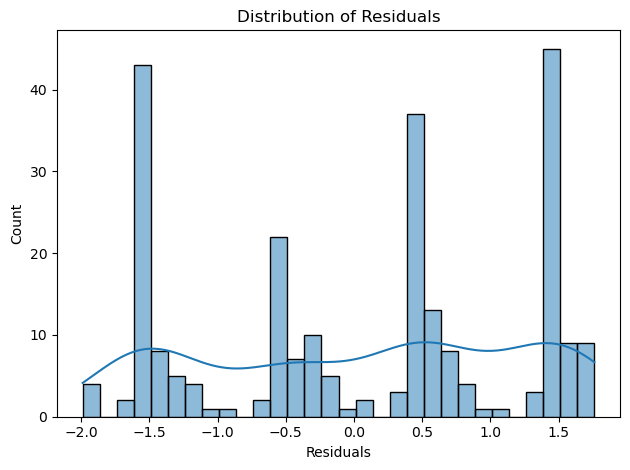

In [10]:
# Distribution of Residuals
import seaborn as sns

sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.tight_layout()
plt.savefig("images/03_regression_model/Distribution of Residuals.png", dpi=300)
plt.show()

- Histogram of residuals: Check normality of residuals
  
  This visualization helps assess whether the residuals are normally distributed, which is one of the key assumptions in linear regression. In our case, the residuals do not appear to be normally distributed, indicating that the normality assumption may not hold.